In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

In [5]:
# read in the data

df = pd.read_csv('./data/movies.csv')


In [6]:
# Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [7]:
# cheking for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing)) 

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
df = df.dropna()

In [9]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

In [24]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

In [19]:
pd.set_option('display.max_rows', None)

In [10]:
# Drop any duplicates

df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [11]:
# Budget high correlation
# Company high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

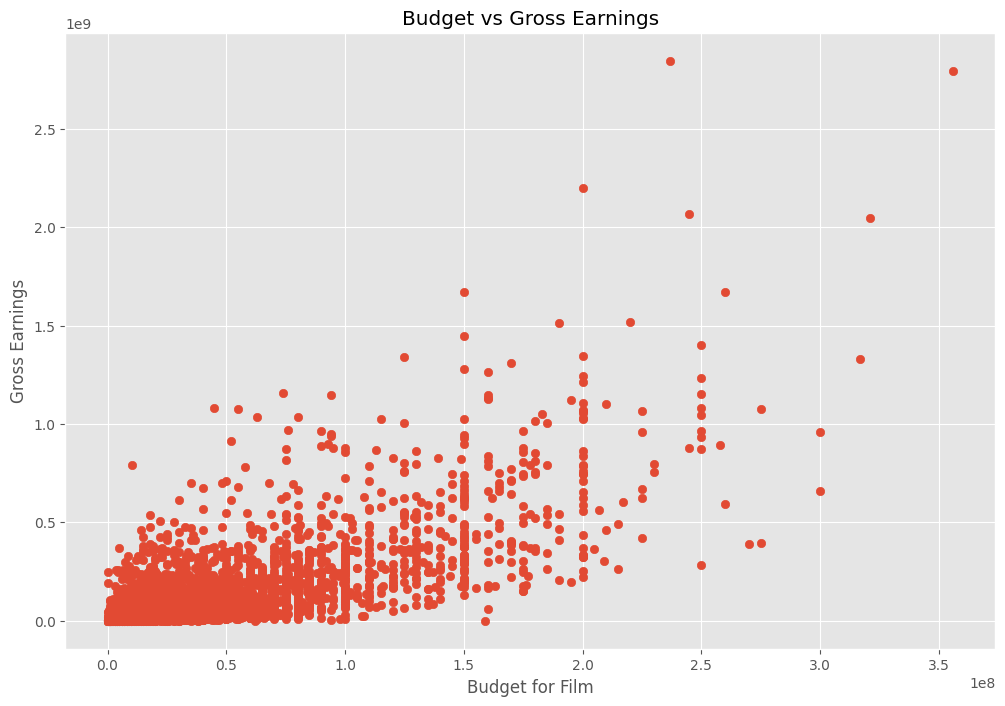

In [12]:
# Scatterplot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show

<Axes: xlabel='budget', ylabel='gross'>

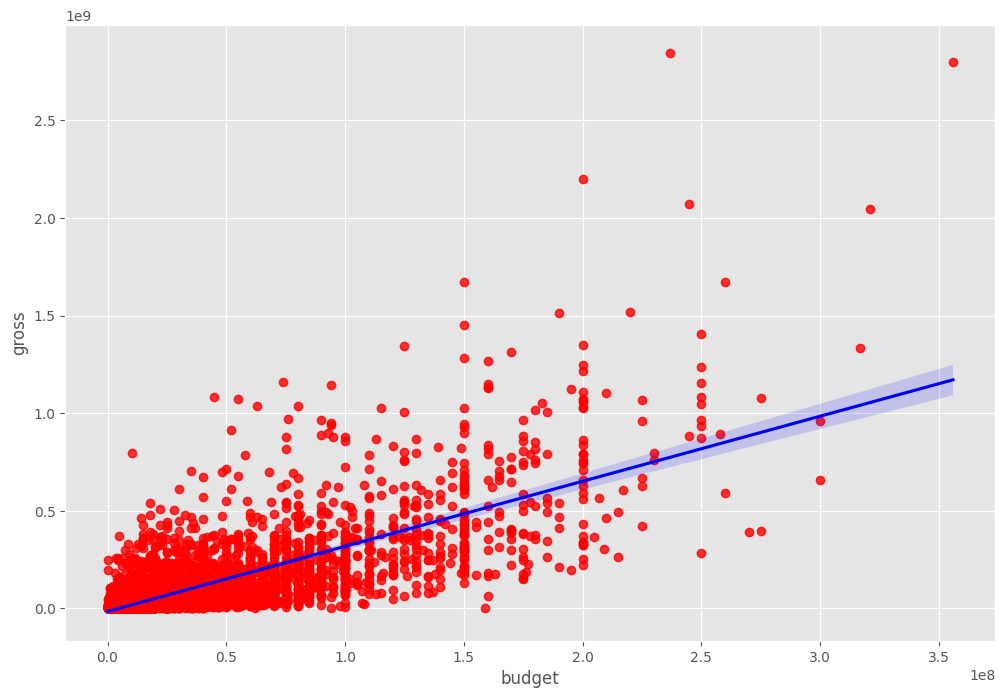

In [13]:
# Plot budget vs gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color': 'blue'})

In [14]:
# Checking for correlations

In [18]:
df.corr(numeric_only=True, method='pearson') #pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [ ]:
# High correlation between budget and gross
# the hypothesis was right

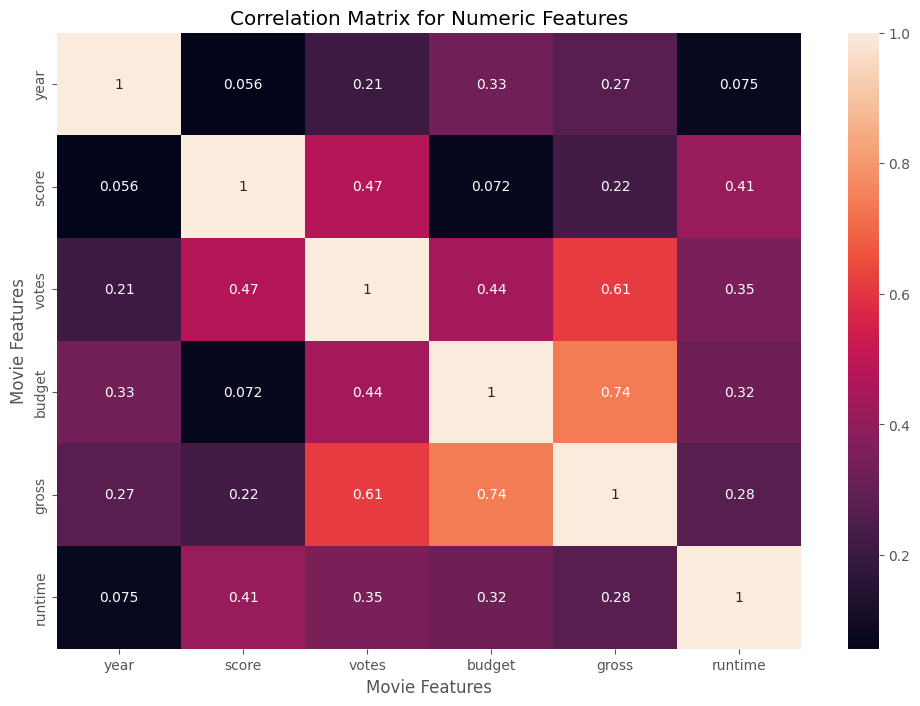

In [21]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [22]:
# Let's look at company

In [14]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized
    

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1     3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3      204       4      4  1980      1127    7.7   221000.0       889    1413   
4      732       6      4  1980      1170    7.3   108000.0       719     351   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7648   415       6      0  2020       904    6.6   140000.0        16    2390   
7649  3556       4      0  2020       713    6.5   102000.0       852    2309   
7650  1153       4      1  2020       904    5.6    53000.0      1809    2827   
7651  3978       4      1  2020       758    6.8    42000.0       294    2091   
7652  4090       3      0  2020       370    6.8     3700.0       746    1184   

      star  country     budget      gross  company  runtime  
0      699       46   19000000   46998772     1426    146.0  
1      214       47    4500000   58853106      452    104.0  
2     1157       47   18000000  538375067      945    124.0  
3     1474       47    3500000   83453539     1108     88.0  
4      271       47    6000000   39846344     1083     98.0  
...    ...      ...        ...        ...      ...      ...  
7648  1812       47   90000000  426505244      452    124.0  
7649   147       47   85000000  319715683     1108     99.0  
7650  1470       47  175000000  245487753     1397    101.0  
7651   640        6  135000000  111105497       12    100.0  
7652  1839        8   80000000  461421559      228    149.0  

[5421 rows x 15 columns]

In [12]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

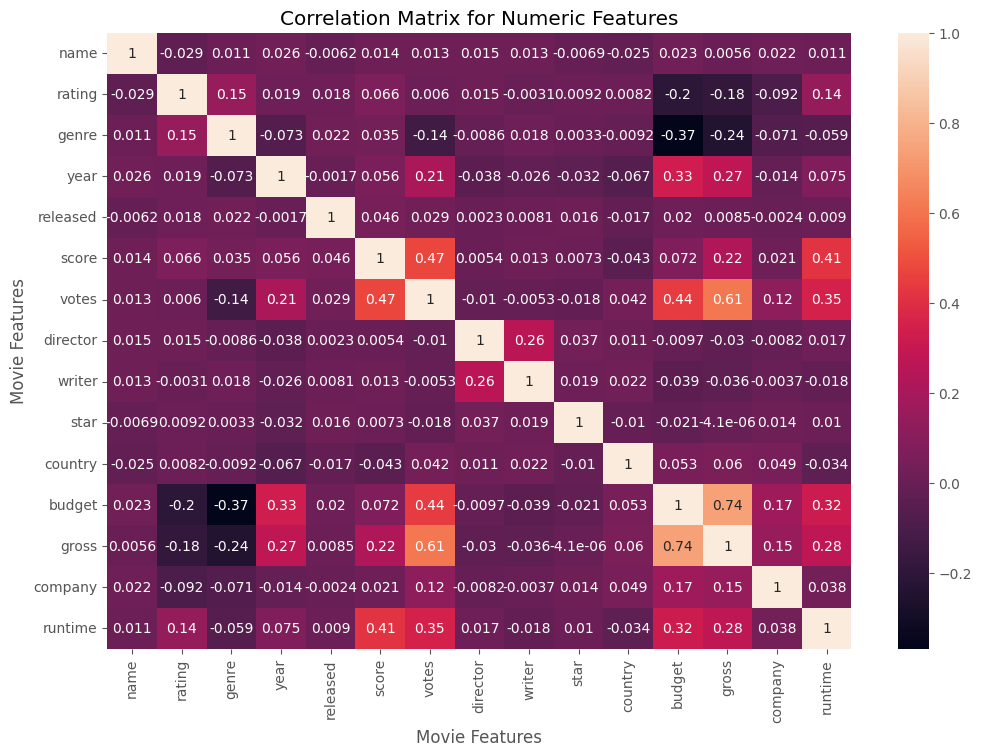

In [15]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [20]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [21]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
rating    budget     -0.203946
budget    rating     -0.203946
gross     rating     -0.181906
rating    gross      -0.181906
votes     genre      -0.135990
genre     votes      -0.135990
company   rating     -0.092357
rating    company    -0.092357
year      genre      -0.073167
genre     year       -0.073167
          company    -0.071334
company   genre      -0.071334
country   year       -0.066748
year      country    -0.066748
runtime   genre      -0.059237
genre     runtime    -0.059237
country   score      -0.043051
score     country    -0.043051
writer    budget     -0.039466
budget    writer     -0.039466
year      director   -0.038354
director  year       -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
year      star       -0.032157
star      year       -0.032157
director

In [22]:
high_correlation = sorted_pairs[(sorted_pairs)> 0.5]
high_correlation

votes     gross       0.614751
gross     votes       0.614751
budget    gross       0.740247
gross     budget      0.740247
budget    budget      1.000000
runtime   runtime     1.000000
votes     votes       1.000000
director  director    1.000000
gross     gross       1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
released  released    1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
company   company     1.000000
rating    rating      1.000000
name      name        1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings.
# Company has low correlation